OCR = Optical character recognition
Permet de reconnaitre des textes sur une image.

Installation :
Plusieurs choses sont nécéssaires ( c'est plus compliqué à installer qu'à utiliser)
-> Visual Studio 14.0 ou + (Build tools est suffisant)
-> la toute dernière version de numpy (pip install --user -U numpy)
-> télécharger git

Ensuite, il faut entrer les commandes suivantes
pip install --user paddleocr

pip install --user paddlepaddle 
( si vous avez un gpu installez directement paddlepaddle-gpu)

et pour finir :
!git clone https://github.com/PaddlePaddle/PaddleOCR


ça peut prendre un peu de temps

toutes les infos/docs :
https://github.com/PaddlePaddle/PaddleOCR

In [ ]:
# pour des raisons de licence on ne peut pas faire import paddleocr 
from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
# pip install opencv-python 
# pip install opencv-contrib-python
import cv2 
import os 
import pandas as pd

In [2]:
# configuration du model d'OCR, 
# lang='fr' pour le français
# fonctionne pour 80 langues 
ocr_model = PaddleOCR(lang='en')

Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Administrateur/.paddleocr/2.4\\ocr\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='box', det_pse_scale=1, rec_algorithm='CRNN', rec_model_dir='C:\\Users\\Administrateur/.paddleocr/2.4\\ocr\\rec\\en\\en_number_mobile_v2.0_rec_infer', rec_image_shape='3, 32, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='C:\\Users\\Administrateur\\AppData\\Roaming\\Python\\Python39\\site-packag

In [3]:
# lien vers l'image
img_path = r"C:\Users\Administrateur\Desktop\deep_learning\img_detect\blood.png"

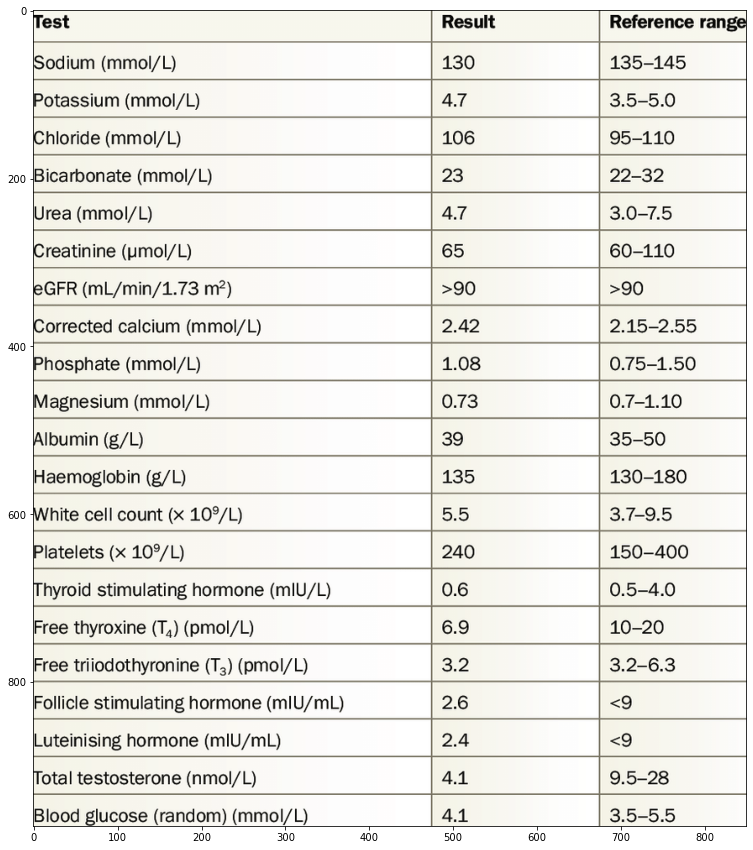

In [5]:
# Voici l'image 
img = cv2.imread(img_path)
plt.figure(figsize=(15,15))
plt.imshow(img)

In [6]:
# création du model
# on peut ajouter en argument :
# det=False -> fait uniquement de la recognition
# rec=False -> fait uniquement de la detection
result = ocr_model.ocr(img_path)

[2022/02/27 23:56:46] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/02/27 23:56:46] root DEBUG: dt_boxes num : 67, elapse : 0.873945951461792
[2022/02/27 23:56:48] root DEBUG: rec_res num  : 67, elapse : 1.9775867462158203


In [7]:
result

[[[[0.0, 2.0], [47.0, 2.0], [47.0, 28.0], [0.0, 28.0]], ('Test', 0.99906087)],
 [[[484.0, 4.0], [552.0, 4.0], [552.0, 29.0], [484.0, 29.0]],
  ('Result', 0.9993798)],
 [[[685.0, 4.0], [847.0, 7.0], [847.0, 27.0], [684.0, 24.0]],
  ('Reference range', 0.9839952)],
 [[[0.0, 50.0], [171.0, 52.0], [170.0, 76.0], [0.0, 74.0]],
  ('Sodium (mmol/L)', 0.99058205)],
 [[[484.0, 52.0], [528.0, 52.0], [528.0, 79.0], [484.0, 79.0]],
  ('130', 0.99880964)],
 [[[684.0, 49.0], [779.0, 52.0], [778.0, 77.0], [683.0, 75.0]],
  ('135-145', 0.9986169)],
 [[[484.0, 95.0], [519.0, 97.0], [517.0, 126.0], [482.0, 123.0]],
  ('4.7', 0.9414905)],
 [[[2.0, 97.0], [199.0, 97.0], [199.0, 118.0], [2.0, 118.0]],
  ('Potassium (mmol/L)', 0.95426816)],
 [[[682.0, 94.0], [767.0, 96.0], [767.0, 122.0], [681.0, 119.0]],
  ('3.5-5.0', 0.99406385)],
 [[[3.0, 142.0], [177.0, 142.0], [177.0, 163.0], [3.0, 163.0]],
  ('Chloride(mmol/L', 0.9744808)],
 [[[484.0, 141.0], [527.0, 141.0], [527.0, 168.0], [484.0, 168.0]],
  ('106', 

In [8]:
# permet d'afficher le texte qui est sur l'image
for res in result:
    print(res[1][0]) 

Test
Result
Reference range
Sodium (mmol/L)
130
135-145
4.7
Potassium (mmol/L)
3.5-5.0
Chloride(mmol/L
106
95-110
Bicarbonate(mmol/L)
23
22-32
4.7
Urea(mmol/L
3.0-7.5
Creatinine(umol/L
65
60-110
90
eGFR (mL/min/1.73 m?)
90
2.42
Corrected calcium(mmol/L
2.15-2.55
1.08
Phosphate(mmol/L)
0.75-1.50
0.73
Magnesium (mmol/L)
0.7-1.10
39
Albumin (g/L)
35-50
135
Haemoglobin (g/L)
130-180
White cell count (x 109/L)
5.5
3.7-9.5
Platelets (x 10%/L)
240
150-400
0.6
Thyroid stimulating hormone(mlU/L
0.5-4.0
6.9
Free thyroxine(T)(pmol/L)
10-20
3.2
Free triiodothyronine(Ta)(pmol/L
3.2-6.3
2.6
Follicle stimulatinghormone(mlU/mL
<9
2.4
Luteinising hormone(mlU/mL
<9
4.1
Total testosterone(nmol/L)
9.5-28
4.1
glucoseCrandom)mmol/L
Bl00d
3.5-5.5


In [9]:
# On récupère les infos 
# boxes = les coordonées des contours des mots détectés
# texts = le texte
# scores = la probabilité d'exactitude 
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [10]:
# définit l'alphabet latin 
font_path = os.path.join(r'C:\Users\Administrateur\PaddleOCR\doc\fonts\latin.ttf')

In [11]:
# import image
img = cv2.imread(img_path) 

# opencv ne se base pas sur les couleurs RGB mais BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

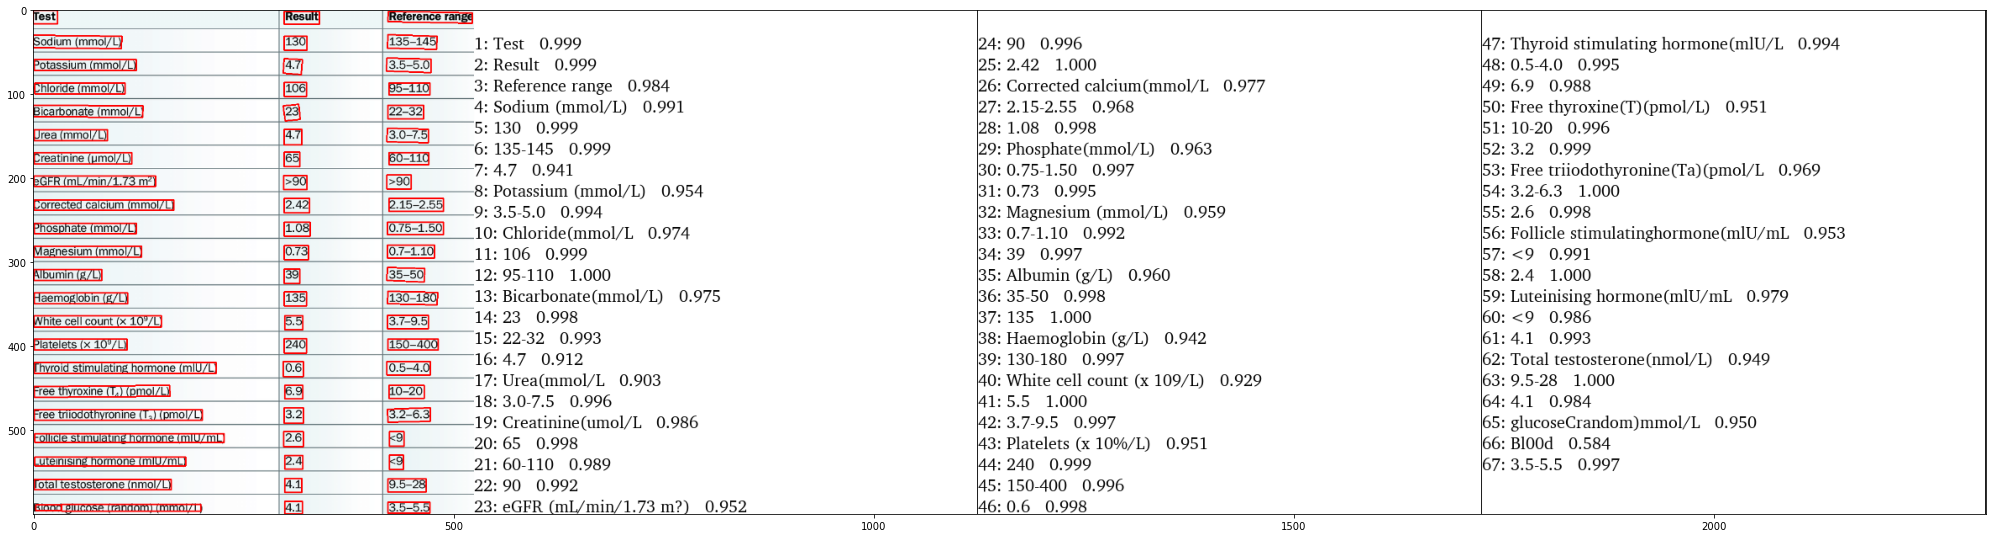

In [12]:
# Viz
plt.figure(figsize=(35,35))

# met les annotations sur le graphique
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

plt.imshow(annotated) 

In [13]:
# après avoir récupéré les informations, paddleOCR permet de les manipuler assez facilement
# result est découpé en 2 partie 
# la première contient les coordonnées des boxes autour des mots
# la 2ème, les mots et la probabilité

# dans notre cas, nous avons un tableau avec 3 colonnes et on veut reproduire le même tableau 
# mais sous forme de dataframe

# on vient récupérer les coordonnées des limites gauches de chaque boxes
# res[0] = coordonnées des boxes
# res[0][0] = coordonnées de la "droite" la plus à gauche de la boxe
# res[0][0][0] = première valeur des coordonnées de la droite

box_coord = []
for res in result:
    box_coord.append(res[0][0][0])

In [14]:
# On a un tableau à 3 colonnes, l'idée est de créer un dataframe similaire
# on a récupéré les coordonnées des limites gauche de chaque boxes
# on va re créer chaque colonne une à une
# Si on regarde les coordonnées que l'on a stocké dans box_coord, on peut les couper en 3
# inférieur à 60
# entre 60 et 600
# supérieur à 600

# Pour créer la première colonne, on prend chaque valeur inférieur à 60 et on la stock dans
# first_columns
first_columns = []
for item in set(box_coord):
    if item < 60 :
        first_columns.append(item)
        
# on vient loop dans result
# pour chaque item dans result, 
# si res[0][0][0] est dans first_column, on ajoute le texte dans first_col_value
first_col_value = []
for res in result:
    if res[0][0][0] in first_columns:
        first_col_value.append(res[1][0])

# on transforme notre liste en serie panda
ft_col_series = pd.Series(first_col_value)

In [15]:
# même chose pour la 2ème colonne
second_columns = []
for item in set(box_coord):
    if 60 < item < 600 :
        second_columns.append(item)
        
second_col_value = []
for res in result:
    if res[0][0][0] in second_columns:
        second_col_value.append(res[1][0])
        
sc_col_series = pd.Series(second_col_value)

In [16]:
# même chose pour la 3eme colonne
third_columns = []
for item in set(box_coord):
    if item > 600 :
        third_columns.append(item)
        
third_col_value = []
for res in result:
    if res[0][0][0] in third_columns:
        third_col_value.append(res[1][0])

th_col_series = pd.Series(third_col_value)

In [18]:
# on transforme en dataframe panda, qui correspond exactement à l'image dont on a extrait les informations
# seul erreur : row 21 et 22 sont séparés
# un peu de nettoyage nécéssaire :)
pd.concat([ft_col_series, sc_col_series, th_col_series], axis=1)

,0,1,2
0,Test,Result,Reference range
1,Sodium (mmol/L),130,135-145
2,Potassium (mmol/L),4.7,3.5-5.0
3,Chloride(mmol/L,106,95-110
4,Bicarbonate(mmol/L),23,22-32
5,Urea(mmol/L,4.7,3.0-7.5
6,Creatinine(umol/L,65,60-110
7,eGFR (mL/min/1.73 m?),90,90
8,Corrected calcium(mmol/L,2.42,2.15-2.55
9,Phosphate(mmol/L),1.08,0.75-1.50


In [19]:
# Maintenant, si on cherche à scanner 100 résultats sanguins
# nous n'avons pas besoin de récupérer toutes les informations
# les test et valeurs de références nous les connaissons déjà, il nous faut uniquement les resultats

df = pd.concat([ft_col_series, sc_col_series, th_col_series], axis=1)

# on peut facilement, ajouter les résultats les uns à la suite des autres
df.drop([0, 2], axis=1).T

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1,Result,130,4.7,106,23,4.7,65,90,2.42,1.08,...,5.5,240,0.6,6.9,3.2,2.6,2.4,4.1,4.1,NaN
